A dataset which consists of two variables is given. First, the dataset is visualized and inspected. Subsequently, a generative model is proposed.

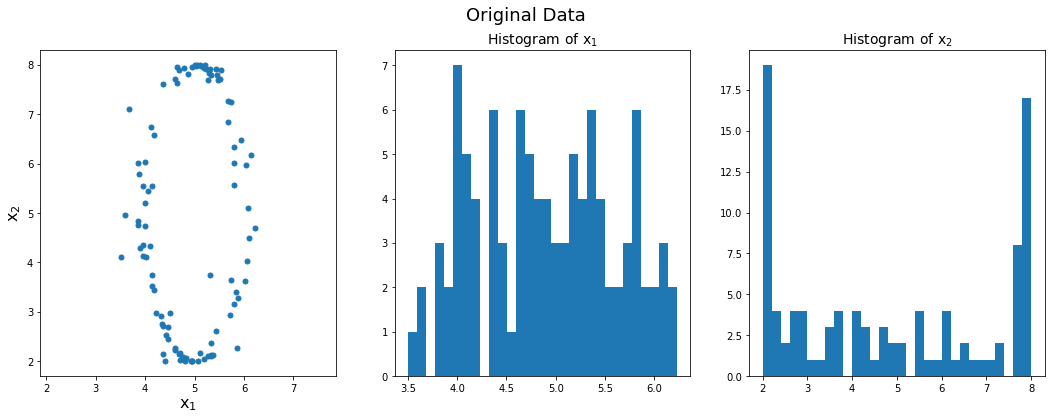

('Mean values of the given dataset: 4.90', '4.85')
('Standard deviation of the given dataset: 0.70', '2.25')


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

X = np.mat('5.219 7.998; 5.102 2.163; 4.089 4.327; 5.046 8.000; 4.596 2.238; 4.356 2.157; 5.282 7.841; 3.594 4.953; 5.376 2.124; 5.320 3.755; 4.938 2.001; 4.003 6.037; 3.988 5.197; 4.137 3.742; 5.535 7.902; 5.332 7.799; 4.712 2.027; 4.788 7.928; 5.713 2.931; 3.897 4.284; 5.670 7.273; 4.713 2.177; 4.687 7.894; 4.064 5.441; 4.430 2.535; 6.066 4.035; 5.733 7.255; 6.071 5.107; 5.336 2.123; 4.129 3.523; 4.509 2.979; 4.765 2.080; 6.041 5.963; 5.877 3.291; 4.931 2.012; 5.224 7.916; 3.502 4.110; 4.805 2.007; 4.942 2.008; 3.957 4.141; 4.323 2.926; 5.199 7.940; 4.227 2.987; 4.612 2.272; 5.439 2.621; 5.467 7.698; 5.936 6.477; 5.197 2.046; 5.841 3.409; 5.791 3.160; 4.184 3.449; 5.271 2.111; 4.365 7.614; 4.744 2.047; 4.649 7.963; 5.793 5.572; 4.999 8.000; 4.683 2.147; 4.860 7.811; 5.791 6.329; 5.277 7.696; 4.109 6.748; 3.877 5.785; 5.735 3.654; 5.324 2.373; 5.318 7.919; 4.462 2.455; 4.410 2.014; 4.636 7.638; 6.017 3.632; 4.336 2.760; 5.788 6.016; 3.859 6.004; 5.022 7.978; 3.959 4.353; 4.001 4.747; 5.522 7.721; 5.857 2.260; 4.596 7.707; 4.833 2.061; 5.073 2.009; 6.091 4.502; 3.845 4.835; 3.961 5.543; 5.104 8.000; 5.667 6.842; 6.229 4.691; 4.352 2.719; 4.139 5.550; 6.148 6.180; 4.456 2.694; 5.459 7.797; 3.861 4.759; 5.139 7.970; 5.435 7.913; 5.333 2.106; 4.016 4.113; 4.187 6.587; 3.681 7.095; 4.943 7.963')

plt.figure(figsize = (18, 6))
plt.suptitle('Original Data', fontsize = 18)
plt.subplot(131)
plt.plot(X[:,0],X[:,1],"o", markersize = 5)
plt.xlim(3, 7)
plt.axis('equal')
plt.xlabel('x$_1$', fontsize = 16)
plt.ylabel('x$_2$', fontsize = 16)

plt.subplot(132)
plt.title('Histogram of x$_1$', fontsize = 14)
n, bins, patches = plt.hist(X[:, 0], 30)
plt.subplot(133)
plt.title('Histogram of x$_2$', fontsize = 14)
n, bins, patches = plt.hist(X[:, 1], 30)

plt.show()

muX1 = np.mean(X[:, 0])
muX2 = np.mean(X[:, 1])
print ("Mean values of the given dataset: %.2f" % muX1, "%.2f" % muX2)

sigmaX1 = np.std(X[:, 0])
sigmaX2 = np.std(X[:, 1])    
print ("Standard deviation of the given dataset: %.2f" % sigmaX1, "%.2f" % sigmaX2)

The scatter plot of x2 vs x1 indicate a nonlinear, possibly an elliptical relationship between these variables. Additionally, histograms for both variables are plotted in order to see how the data are distributed. x1 appears to be uniformly distributed between 3.5 and 6.5, however x2 exhibits a bimodal distribution between 2 and 8, resembling that of motion of a pendulum. Thus, the following generative model is proposed:

In [3]:
N = 1e5
noise1 = 0.1
noise2 = 0.01
op = np.random.binomial(1, 0.5, int(N))

x1 = 4 + np.random.rand(int(N))*2
x1m = x1 + np.random.randn(int(N))*noise1
x2 = (3*np.sqrt(1-np.power((x1-5), 2)) + 5)*op + (5 - 3*np.sqrt(1-np.power((x1-5), 2)))*(1-op) + np.random.randn(int(N))*noise2

Variable x1, generated by the model is uniformly distributed in accordance with the given dataset. The second variable, x2, however is generated from two unimodal distributions, both of which are equally likely.

I.e., an indicator function, which is essentially a bernouilli distributed random variable with a success probability of 0.5, is used. x2 is essentially the sum of two symmetric functions of x1, however, depending on the outcome of each bernouilli trial, only one of the functions remains in the equation whereas the other function vanishes. 

The functional relationship being proposed here is an equation for ellips which has a major axis of length 6, a minor axis of length 2, and whose center is located at (5, 5).

x1 can be thought of as the manipulated variable in the context of this generative model, and x1m is the measurement of that manipulated variable. The "noise" terms in both x1m and x2 are there to represent the measurement error.

Once the generative model is set, 100 samples are drawn from it without replacement. First things first, basic statistics of our samples, such as sample mean and standard deviation, are compared with those of the given dataset.

In [4]:
n = 100
a = np.arange(N)
samples = np.random.choice(int(N), n, replace = False).astype(int)
m1 = np.mean(x1[samples])
m2 = np.mean(x2[samples])
print ("Means of samples from the generated dataset: %.2f" % m1, "%.2f" % m2)

s1 = np.std(x1[samples])
s2 = np.std(x2[samples])    
print ("Standard deviation of samples from the generated dataset: %.2f" % s1, "%.2f" % s2)

('Means of samples from the generated dataset: 5.05', '5.03')
('Standard deviation of samples from the generated dataset: 0.59', '2.41')


Samples from the generative model and the dataset given can be further compared using histograms and a scatter plot.

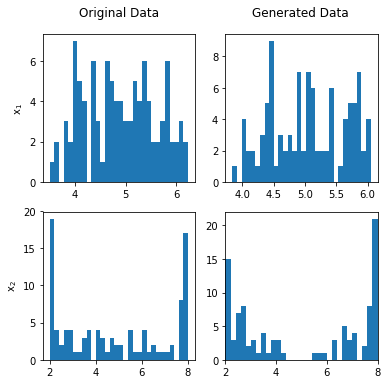

In [5]:
plt.figure(figsize = (6, 6))
plt.subplot(221)
plt.figtext(0.21, 0.92, 'Original Data',  fontsize = 12)
plt.ylabel('x$_1$', fontsize = 10)
n, bins, patches = plt.hist(X[:, 0], 30)
plt.subplot(222)
plt.figtext(0.61, 0.92, 'Generated Data',  fontsize = 12)
n, bins, patches = plt.hist(x1m[samples], 30)
plt.subplot(223)
plt.ylabel('x$_2$', fontsize = 10)
n, bins, patches = plt.hist(X[:, 1], 30)
plt.subplot(224)
n, bins, patches = plt.hist(x2[samples], 30)
plt.xlim(2, 8)
plt.show()

Histograms above show that the samples taken from the proposed generative model have similar distributions to the variables, x1 and x2 given in the dataset. Similarly, the scatter plot below also indicates that the samples generated by the model exhibit similar relationship to that in the original dataset.

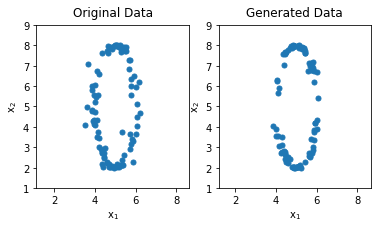

In [6]:
plt.figure(figsize = (6, 3))
plt.subplot(121)
plt.figtext(0.21, 0.92, 'Original Data',  fontsize = 12)
plt.plot(X[:,0],X[:,1],"o", markersize = 5)
plt.axis('equal')
plt.ylim(1, 9)
plt.xlabel('x$_1$', fontsize = 10)
plt.ylabel('x$_2$', fontsize = 10)

plt.subplot(122)
plt.figtext(0.61, 0.92, 'Generated Data', fontsize = 12)
plt.plot(x1m[samples], x2[samples],"o", markersize = 5)
plt.axis('equal')
plt.ylim(1, 9)
plt.xlabel('x$_1$', fontsize = 10)
plt.ylabel('x$_2$', fontsize = 10)

plt.show()